In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import random

# Name: Aayan Ahmed Khan
# Student ID: 31486347

# Part 1B

## a)

__Description of Gillespie Algorithm__: This algorithm was implemented by considering all the possible events in our system and the effects of these events on the population of rabbits and foxes. We had to deal with a division by zero error incase the population of either species ever dropped to zero. Helper function equations() was implemented to help simplify the code


List of events and their effects (8 equations in total):
0. a rabbit is born with probability proportional to b*x, effect: x = x+1
1. a rabbit dies with probability proportional to d*x, effect: x = x-1
2. a rabbit gets eaten by a fox with probability proportional to alpha⋅x⋅y, effect: x = x-1
3. a rabbit is hunted with probability proportional to f*x, effect: x = x-1

4. a fox is born with probability proportional to b_dash*y, effect: y = y+1
5. a fox dies with probability proportional to d_dash*y, effect: y = y-1
6. a fox survives by eating rabbits with probability proportional to beta⋅x⋅y, effect: y = y+1
7. a fox survives is hunted with probability proportional to 0.5⋅f⋅y, effect: y = y-1

In [2]:
#constants and proportions declared
b = 0.8
d = 0.1
b_dash = 0.1
d_dash = 0.6
alpha = 0.04
beta = 0.01
f = 0.05

In [3]:
#this function calculates and returns the probabilities of events involving the rabbits and foxes system
def equations(j, x, y):
    if j == 0:
        return b*x
    
    elif j == 1:
        return d*x
    
    elif j == 2:
        return alpha*x*y
    
    elif j == 3:
        return f*x
    
    elif j == 4:
        return b_dash*y
    
    elif j == 5:
        return d_dash*y
    
    elif j == 6:
        return beta*x*y
    
    elif j == 7:
        return 0.5*f*y

In [4]:
def gillespie_algorithm(x, y, num_iterations = 10000):
    
    #store values of rabbits and foxes after each iteration in res
    res = [[x, y]]
    
    #store time after each iteration in time array
    time = [0]
    
    for i in range(num_iterations):
        
        #calculate sample times for events 0-7
        sample_times = []
        for j in range(8):
            
            #counter division by zero error
            if equations(j, x, y) == 0:
                sample_times += [np.Inf]
            
            else:
                sample_times += [(-np.log(random.random()) / equations(j, x, y))]
        
        #find index of minimum time, index corresponds to the events
        index_min = np.argmin(sample_times)
        
        #execute event with the minimum time and record new populations and update time
        #index_min number references to event number
        if index_min == 0:
            x = x+1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 1:
            x = x-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 2:
            x = x-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 3:
            x = x-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 4:
            y = y+1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
        
        elif index_min == 5:
            y = y-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
           
        elif index_min == 6:
            y = y+1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
           
        elif index_min == 7:
            y = y-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
    return time, res

In [5]:
#initial populations of rabbits and foxes
x0 = 25
y0 = 15

### hunting rate f = 0.00

__Interpretation of dynamics__: In the time-evolution plot, while we can see that the populations of rabbits and foxes both alternate, their peaks and troughs are much less regular than the deterministic model. Furthermore, in the phase plot we can see that population of rabbits and foxes alternates around some stationary point but this point is not very distinct. Finally, since this is a stochastic model, towards the end we see the population of foxes drop to zero which ultimately results in the population of foxes staying at zero while the population of rabbits increases to a very large number. In some cases, the population of rabbits goes to zero first, which results in the population of foxes going to zero as well

In [6]:
random.seed(5)
f = 0.00
time, res = gillespie_algorithm(x=x0, y=y0, num_iterations = 10000)
x_values = [res[i][0] for i in range(len(res))] 
y_values = [res[i][1] for i in range(len(res))] 

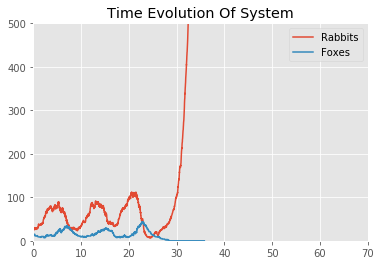

In [7]:
plt.plot(time, x_values, label="Rabbits")
plt.plot(time, y_values, label="Foxes")
plt.title("Time Evolution Of System")
plt.xlim(0, 70)
plt.ylim(0, 500)
plt.legend()

Text(0.5, 1.0, 'Phase Plot')

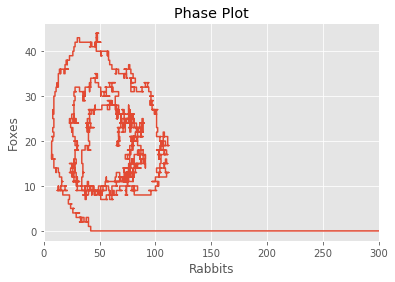

In [8]:
plt.plot(x_values, y_values)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.xlim(0, 300)
plt.title("Phase Plot")

### hunting rate f = 0.10

__Interpretation of dynamics__: In the time-evolution plot, while we can see that the populations of rabbits and foxes both alternate, their peaks and troughs are much less regular than the deterministic model. Furthermore, in the phase plot we can see that population of rabbits and foxes alternates around some stationary point but this point is not very distinct. Finally, since this is a stochastic model, towards the end we see the population of foxes drop to zero which ultimately results in the population of foxes staying at zero while the population of rabbits increases to a very large number. In some cases, the population of rabbits goes to zero first, which results in the population of foxes going to zero as well. It seems that introducing a hunting rate makes it more likely for the population of foxes or rabbits to go to zero.

In [9]:
random.seed(5)
f = 0.10
time, res = gillespie_algorithm(x=x0, y=y0, num_iterations = 10000)
x_values = [res[i][0] for i in range(len(res))] 
y_values = [res[i][1] for i in range(len(res))] 

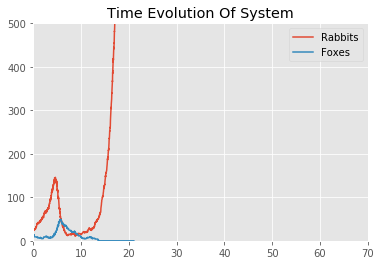

In [10]:
plt.plot(time, x_values, label="Rabbits")
plt.plot(time, y_values, label="Foxes")
plt.title("Time Evolution Of System")
plt.xlim(0, 70)
plt.ylim(0, 500)
plt.legend()

Text(0.5, 1.0, 'Phase Plot')

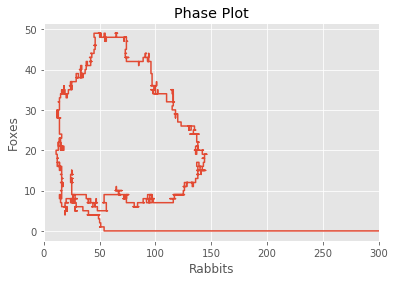

In [11]:
plt.plot(x_values, y_values)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.xlim(0, 300)
plt.title("Phase Plot")

### hunting rate f = 0.30

__Interpretation of dynamics__: In the time-evolution plot, we don't see the populations of rabbits and foxes both alternate as the population of foxes goes to zero straight away which results in the population of rabbits exploding. It seems that introducing a higher hunting rate makes it more likely for the population of either foxes or rabbits to go to zero. Overall it still seems the the population of foxes is more likely to go to zero first compared to the population of rabbits. Thus the phase plot doesn't show any alternating points around a stationary point either.

In [12]:
random.seed(5)
f = 0.30
time, res = gillespie_algorithm(x=x0, y=y0, num_iterations = 10000)
x_values = [res[i][0] for i in range(len(res))] 
y_values = [res[i][1] for i in range(len(res))] 

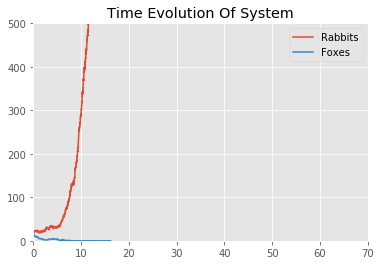

In [13]:
plt.plot(time, x_values, label="Rabbits")
plt.plot(time, y_values, label="Foxes")
plt.title("Time Evolution Of System")
plt.xlim(0, 70)
plt.ylim(0, 500)
plt.legend()

Text(0.5, 1.0, 'Phase Plot')

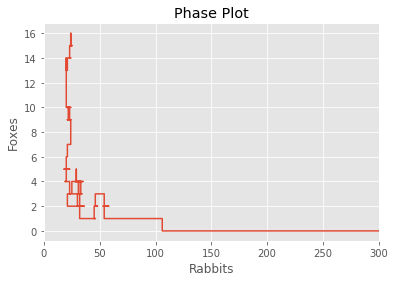

In [14]:
plt.plot(x_values, y_values)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.xlim(0, 300)
plt.title("Phase Plot")

### hunting rate f = 0.50

__Interpretation of dynamics__: In the time-evolution plot, we don't see the populations of rabbits and foxes both alternate as the population of foxes goes to zero straight away which results in the population of rabbits exploding. It seems that introducing a higher hunting rate makes it more likely for the population of either foxes or rabbits to go to zero. Overall it still seems the the population of foxes is more likely to go to zero first compared to the population of rabbits. Thus the phase plot doesn't show any alternating points around a stationary point either.

In [15]:
random.seed(7)
f = 0.50
time, res = gillespie_algorithm(x=x0, y=y0, num_iterations = 10000)
x_values = [res[i][0] for i in range(len(res))] 
y_values = [res[i][1] for i in range(len(res))] 

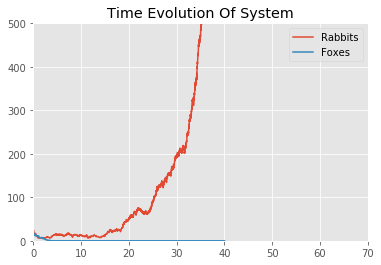

In [16]:
plt.plot(time, x_values, label="Rabbits")
plt.plot(time, y_values, label="Foxes")
plt.title("Time Evolution Of System")
plt.xlim(0, 70)
plt.ylim(0, 500)
plt.legend()

Text(0.5, 1.0, 'Phase Plot')

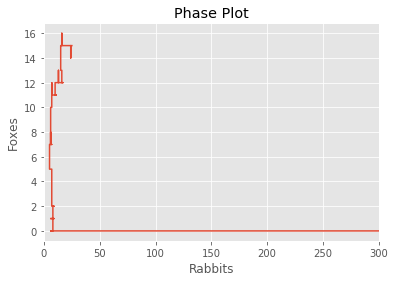

In [17]:
plt.plot(x_values, y_values)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.xlim(0, 300)
plt.title("Phase Plot")

### hunting rate f = 0.75

__Interpretation of dynamics__: In the time-evolution plot, we don't see the populations of rabbits and foxes both alternate as the population of foxes goes to zero straight away which results in the population of rabbits slowly go to zero over a long time due to the excessive hunting rate. It seems that introducing an even higher hunting rate makes it much more likely for both the populations of foxes and rabbits to go to zero. Overall it still seems the the population of foxes is more likely to go to zero first compared to the population of rabbits. Thus the phase plot doesn't show any alternating points around a stationary point either.

In [18]:
random.seed(5)
f = 0.75
time, res = gillespie_algorithm(x=x0, y=y0, num_iterations = 10000)
x_values = [res[i][0] for i in range(len(res))] 
y_values = [res[i][1] for i in range(len(res))] 

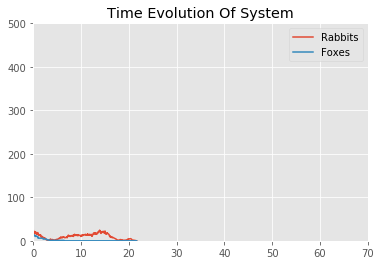

In [19]:
plt.plot(time, x_values, label="Rabbits")
plt.plot(time, y_values, label="Foxes")
plt.title("Time Evolution Of System")
plt.xlim(0, 70)
plt.ylim(0, 500)
plt.legend()

Text(0.5, 1.0, 'Phase Plot')

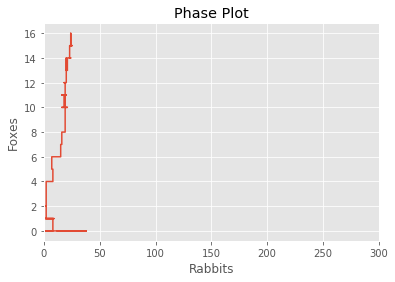

In [20]:
plt.plot(x_values, y_values)
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.xlim(0, 300)
plt.title("Phase Plot")

## b)

__firstly, the gillespie algorithm was edited to take as input time. The algorithm now terminates if the num_iterations
is reached or if time exceeds max_time__

In [21]:
def gillespie_algorithm(x, y, num_iterations = 10000, max_time = 10):
    
    #store values of rabbits and foxes after each iteration in res
    res = [[x, y]]
    
    #store time after each iteration in time array
    time = [0]
    
    for i in range(num_iterations):
        
        #calculate sample times for events 0-7
        sample_times = []
        for j in range(8):
            
            #counter division by zero error
            if equations(j, x, y) == 0:
                sample_times += [np.Inf]
            
            else:
                sample_times += [(-np.log(random.random()) / equations(j, x, y))]
        
        #find index of minimum time, index corresponds to the events
        index_min = np.argmin(sample_times)
        
        #execute event with the minimum time and record new populations and update time
        #index_min number references to event number
        if index_min == 0:
            x = x+1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 1:
            x = x-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 2:
            x = x-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 3:
            x = x-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
            
        elif index_min == 4:
            y = y+1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
        
        elif index_min == 5:
            y = y-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
           
        elif index_min == 6:
            y = y+1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
           
        elif index_min == 7:
            y = y-1
            res += [[x, y]]
            time += [time[-1] + sample_times[index_min]]
        
        #stop iterations if max_time is exceeded
        if time[-1] > max_time:
            break
            
    return time, res

# Montecarlo Estimation Function

In [22]:
def montecarlo_sustainable(initial_hunting_rate=1, probability = 0.20):
    
    extinction_probability = 1
    hunting_rate = initial_hunting_rate
    
    #initial populayions of rabbits and foxes
    x0 = 25
    y0 = 15

    
    #while probability of extinction is greater than desired probability
    while extinction_probability >= probability:
        
        #variable to count number of extinctions
        extinction_counter = 0
        
        #decrease hunting_rate by 0.01
        hunting_rate = hunting_rate - 0.01
        
        #set the hunting_rate for f since f is the global variable controlling 
        #hunting rate for our functions g(x,y) and h(x,y)
        listOfGlobals = globals()
        listOfGlobals['f'] = hunting_rate
    
        #run the gillespie algorithm 100 times for each hunting_rate
        for i in range(101):
            
            #the gillespie algorithm terminates as soon as the time exceeds 10 or if both populations reach 0 (time=inf)
            time, res = gillespie_algorithm(x=x0, y=y0, num_iterations = 10000, max_time = 10)
            
            #check if either of the populations were 0 at the end, signalling an extinction
            if res[-1][0] == 0 or res[-1][1] == 0:
                extinction_counter += 1
        
        #calculate p__firstly, the gillespie algorithm was edited to take as input time. The algorithm now terminates 
        #if the num_iterations is reached or if time exceeds max_time__robability of extinction
        extinction_probability = extinction_counter / 100
        
    return hunting_rate, extinction_probability


# Largest Sustainable Hunting Rate

In [23]:
largest_hunting_rate, extinction_probaility = montecarlo_sustainable(initial_hunting_rate=1, probability = 0.20)

In [24]:
print(largest_hunting_rate)

0.12999999999999923


## __Explanation of how Montecarlo simulation was used to find largest sustainable hunting rate__: 
I set up the function so that it started off with the hunting_rate of 1 and then decremented the hunting_rate by 0.01 for each iteration that resulted in an extinction_probability of greater than or equal to 0.2. Montecarlo simulation was utilised in this function by running the gillespie_algorithm a 100 times for each hunting_rate and then calculating the number of extinctions that occured out of the 100 times the gillespie_algorithm was executed. Finally, the first hunting_rate that results in an extinction rate of less than 0.2 was chosen to be the highest sustainable hunting_rate. It is important to note that since we decrement in chunks of 0.01, the hunting rate likely only has a precision of two decimal places. To increase this precision, we could decrement by a lower number but this would significantly increase the processing time